In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
from astropy.constants import h, c, k_B # https://docs.astropy.org/en/latest/constants/index.html#reference-api

In [27]:
w.filterwarnings('ignore')

# Planck's law of black-body radiation

Planck's law states that

\begin{equation}
B_{\nu}(T) = \frac{2 \nu^{2}}{c^{2}} \frac{h \nu}{e^(\frac{h \nu}{kT}) - 1}
\end{equation}

where

- $B_{\nu} (T)$ is the spectral radiance (the power per unit solid angle and per unit of area normal to the propagation) density of frequency $\nu$ radiation per unit frequency at thermal equilibrium at temperature $T$. Units: power / [area * solid angle * frequency]; 
- $h$ is the Planck constant;
- $c$ is the speed of light in a vacuum;
- $k$ is the Boltzmann constant;
- $\nu$ is the frequency of the electromagnetic radiation;
- $T$ is the absolute temperature of the body.

In [11]:
def planck(wav, T):
    a = 2.0 * h.value * np.pi * c.value ** 2
    b = h.value * c.value / (wav * k_B.value * T)
    intensity = a / ((wav ** 5) * (np.e ** b - 1.0))
    return intensity

sns.set_palette('autumn_r')
sns.set_style('darkgrid')

In [14]:
wavelengths = np.arange(1e-9, 3e-6, 1e-9) 
T = np.array([t for t in range(3500, 6000, 500)])

data = pd.DataFrame(
    {
        fr'T_{t + 1}' : planck(wavelengths, T[t]) for t in range(len(T))
    }
)

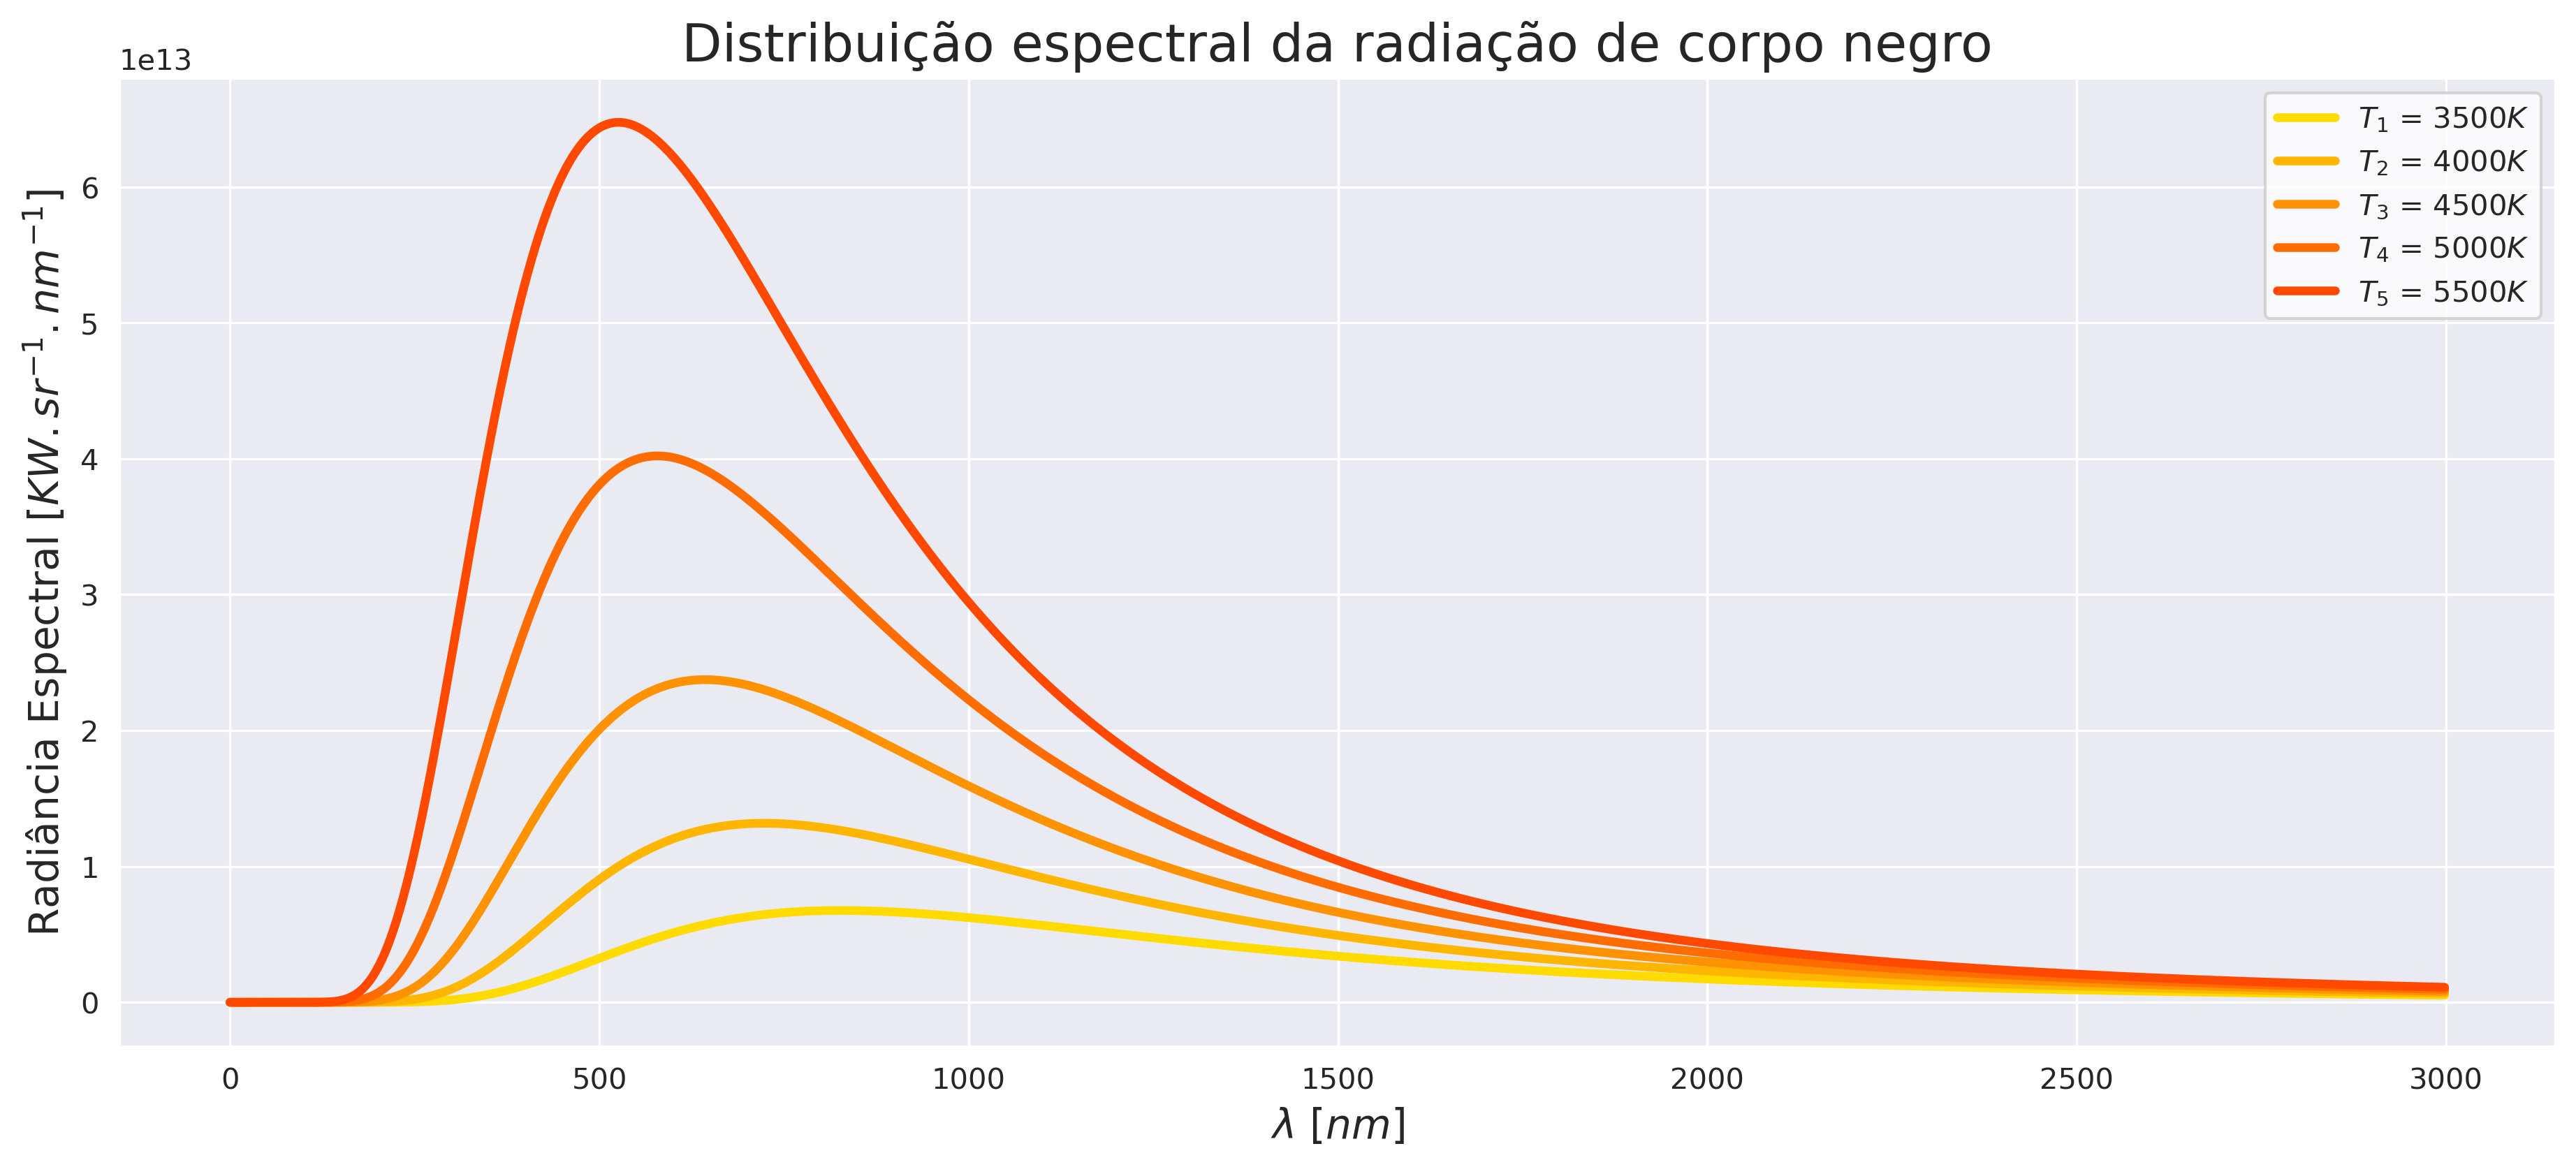

In [28]:
f = plt.figure(figsize=(15, 6), dpi=300)
plt.plot(data, lw=3., label=[fr'$T_{i + 1}$ = ${T[i]}K$' for i in range(5)])
plt.title('Distribuição espectral da radiação de corpo negro', fontsize=18)
plt.xlabel(r'$\lambda$ $[nm]$', fontsize=14)
plt.ylabel(r'Radiância Espectral $[KW . sr^{-1} . nm^{-1}]$', fontsize=14)
plt.legend(facecolor='white')
plt.show()
f.savefig('spectral_radiance.png')